# DS 3000 - Assignment 10

**Student Name**: Julia Knopp

**Date**: November 8, 2023


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [41]:
#import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [42]:
#run this cell to install the fast parquet library
!pip install fastparquet

## Question 1: 

Load the data directly from the URL into a DataFrame.

In [43]:
# provide the url to the data
url = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet'

# load the data into a dataframe using the url
tripdata_df = pd.read_parquet(url, #provide the URL to the data source
                      engine = 'fastparquet')

# display information about the dataframe
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398632 entries, 0 to 398631
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               398632 non-null  int64         
 1   lpep_pickup_datetime   398632 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  398632 non-null  datetime64[ns]
 3   store_and_fwd_flag     317739 non-null  object        
 4   RatecodeID             317739 non-null  float64       
 5   PULocationID           398632 non-null  int64         
 6   DOLocationID           398632 non-null  int64         
 7   passenger_count        317739 non-null  float64       
 8   trip_distance          398632 non-null  float64       
 9   fare_amount            398632 non-null  float64       
 10  extra                  398632 non-null  float64       
 11  mta_tax                398632 non-null  float64       
 12  tip_amount             398632 non-null  floa

## Question 2: 
(10 pts) Include any previous data preparation steps, EDA and visualizations. It is ok to reuse your previous code from assignment 4. However, ensure that you update the code based on the previous feedback from the TAs. Also, address the following:
 
Ensure that you delete any widespread missing data and handle negative dollar amounts. Justify your approach to handling negative amounts.

The findings from your previous analysis would have indicated that most customers use green taxis to travel short distances. Therefore, ensure that you filter any outlier trips.

In [44]:
# handle invalid data
# delete data where the passenger_count is less than one
tripdata_df = tripdata_df[tripdata_df['passenger_count'] >= 1]
# delete data where the trip_cost is negative
tripdata_df = tripdata_df[tripdata_df['fare_amount'] >= 0]
# delete data where the total_amount is negative
tripdata_df = tripdata_df[tripdata_df['total_amount'] >= 0]
# delete data where RatecodeID is not a value 1, 2, 3, 4, 5, 6
tripdata_df = tripdata_df[tripdata_df['RatecodeID'] <= 6]
# delete data where trip distance is less than 0
tripdata_df = tripdata_df[tripdata_df['trip_distance'] >= 0]
# delete data where tip amount is less than 0
tripdata_df = tripdata_df[tripdata_df['tip_amount'] >= 0]
# delete data where toll amount is less than 0
tripdata_df = tripdata_df[tripdata_df['tolls_amount'] >= 0]

# handle missing values
# drop the ehail fee column
tripdata_df = tripdata_df.drop(columns=['ehail_fee'])

# handle null data
# delete rows that contain null values 
tripdata_df = tripdata_df.dropna(subset=['store_and_fwd_flag'], how='all')

# data type conversions
# change data type of passenger count from float to int
tripdata_df['passenger_count'] = tripdata_df['passenger_count'].astype(int)
# change data type of ratecodeID from float to int
tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].astype(int)
# change data type of payment type from float to int
tripdata_df['payment_type'] = tripdata_df['payment_type'].astype(int)
# change data type of trip type from float to int
tripdata_df['trip_type'] = tripdata_df['trip_type'].astype(int)

# filter out trip distance outliers
# get the first quartile value
Q1 = tripdata_df['trip_distance'].quantile(0.25)
# get the thrid quartile value
Q3 = tripdata_df['trip_distance'].quantile(0.75)
# calculate IQR
IQR = Q3 - Q1
# set the upper bound for values greater to be removed
upper_bound = Q3 + 1.5 * IQR
# remove the outliers
tripdata_df = tripdata_df[(tripdata_df['trip_distance'] <= upper_bound)]

# display new info about the dataframe
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289222 entries, 0 to 317737
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               289222 non-null  int64         
 1   lpep_pickup_datetime   289222 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  289222 non-null  datetime64[ns]
 3   store_and_fwd_flag     289222 non-null  object        
 4   RatecodeID             289222 non-null  int64         
 5   PULocationID           289222 non-null  int64         
 6   DOLocationID           289222 non-null  int64         
 7   passenger_count        289222 non-null  int64         
 8   trip_distance          289222 non-null  float64       
 9   fare_amount            289222 non-null  float64       
 10  extra                  289222 non-null  float64       
 11  mta_tax                289222 non-null  float64       
 12  tip_amount             289222 non-null  float64  

In [45]:
tripdata_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2020-02-01 00:10:25,2020-02-01 00:14:34,N,1,74,41,1,0.76,4.5,0.5,0.5,0.00,0.0,0.3,5.80,2,1,0.0
1,2,2020-02-01 00:16:59,2020-02-01 00:21:35,N,1,74,74,1,0.72,5.0,0.5,0.5,0.00,0.0,0.3,6.30,1,1,0.0
2,2,2020-02-01 00:19:31,2020-02-01 00:25:29,N,1,223,7,1,0.89,6.0,0.5,0.5,1.82,0.0,0.3,9.12,1,1,0.0
3,2,2020-02-01 00:43:52,2020-02-01 00:48:58,N,1,145,145,1,1.12,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2,1,0.0
4,2,2020-02-01 00:32:53,2020-02-01 00:35:19,N,1,166,166,1,0.65,4.0,0.5,0.5,1.06,0.0,0.3,6.36,1,1,0.0


### Justification for Data Preparation

In the data preparation step, I started with the code I used from assignment four. For example, I handled negative ride and money values by eliminating any rows that held values that were less than 0, as seen above. However, I also made some changes based on mistakes I made before. 

First of all, I decided to remove a lot more data with null values, rather than trying to replace it. I realize that trying to input values could definitely affect or skew the data when this many values are missing, so it is best to remove where the values are unknown.

Secondly, I made the change to filter out any outliers for trip distance as stated in the problem. To approach this I found a commonly used formula to calculate upper-bound outliers (upper_bound = Q3 + 1.5 * IQR: any value above the calculated one would be considered an outlier).

## Question 3
(5 pts) Based on the insights from your EDA, select the required features to build your model and ensure that you encode any categorical variables. Briefly explain the reason for the features that you selected.
Remember that Data Science relies heavily on experimentation. Therefore, you are encouraged to experiment with your data.

Tip #1: ensure that you carefully consider each feature. For example, the total_amount is a variable in your dataframe; however the total amount for each trip can also be obtained if you add all the charges for each passenger (e.g. fare_amount + extra + mta_tax + tip_amount + tolls_amount + improvement_surcharge + congestion_surcharge). Therefore, is it best to include the total_amount in your model or the breakdown that shows each individual charge? Think about the pros and cons of your decisions.

Tip #2: you are predicting the tip amount, therefore it should not be one of your explanatory variables.

In [46]:
# select features to be explanatory variables to build the model
X = tripdata_df[['passenger_count',
                 'trip_distance',
                 'payment_type',
                 'total_amount']]

# select the tip amount as what we want to predict
y = tripdata_df['tip_amount']

### Explaination

When trying to decide what features to include in the model, I chose to include: passenger count, trip distance, payment type, and total amount. 

I choose to include passenger count because I thought that maybe having more passengers would make the riders more likely to tip a higher amount. 

I included the trip distance because it makes sense that a shorter and more convient ride would be tipped less than a longer ride. 

Payment type I thought was a very important variable to focus on regarding tip. If someone is paying with cash, I feel like they are very likely to say 'keep the change' if the money amount they pay is slightly over the total amount. On the other hand, if someone is paying with a credit card, depending on the system, it may need to be inputted manuely or at a fixed rate of 10%, 15%, etc.

I chose to also include total amount because I thought it would be the most important variable when considering tip amount. It is very likely, in my opinion, that riders will tip based off of their bill. As I stated before, people are likely to tip at a fixed percentage rate.

##### On Tip #1
When considering on either including total amount or including all the various charges that add up to be the total amount, there were pros and cons to each. Despite knowing how each monetary variable affects the tip amount and being able to break it down if using the various charges, I ultimately chose to just use the total amount value. This is because the time and efficiency of calculating everything is much much lower. Additionally, we are not so much exploring how variables such as congestion surcharge and mta tax affect tipping, we are just trying to predict the tip amount. Therefore, I felt it was unnecessary to calculate using all the charges.

## Question 4
(5 pts) Partition the prepared data into train/test sets and ensure that your partitions are reproducible.

In [47]:
# preform a test-train split to partition
X_train, X_test, y_train, y_test = train_test_split(X, # the input features
                                                    y, # the label
                                                    test_size=0.3, # set aside 30% of the data as a test set
                                                    random_state=42, # reproduce the results
                                                   )

## Question 5
(10 pts) Using the Random Forest algorithm, build a machine learning model that predicts the tip amount.

Think about the following: Are you performing classification or regression? Ensure that you choose the appropriate Random Forest Classifier/Regressor from scikit-learn.

In [48]:
# create the random forest regressor
rf = RandomForestRegressor(random_state=42)
# fit the model
rf.fit(X_train, y_train)

#predict the labels for the test set
y_pred = rf.predict(X_test).round(2)

# print the predictions for tip amount
print('The predicted tip amount is: {}'.format(y_pred))

The predicted tip amount is: [0.   4.76 0.   ... 0.   0.   1.31]


### Evaluation
When thinking about the problem, I came to the conclusion that we are preforming regression, rather than classification. I believe this is the case because we are striving to predict a numerical amount. Therefore, we will be using the Random Forest Regressor.

## Question 6
(5 pts) Evaluate the predictions from your model and comment on the results. Ensure that you choose the appropriate metric to evaluate the model and round your calculations to two decimal places. Remember that we evaluate models differently depending on the task, i.e. classification or regression.

In [49]:
# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred).round(2)

# print the evaluatation of the prediction
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 0.92


Because the task at hand is a regression, we evaluate the model by finding the mean squared error.

The mse of the model is 0.92 meaning how close the values are to the actual values. Honestly, I feel that the mse is pretty good for this context, considering tip is usually a low number. This means that the model did preform particularly well in my opinion.

## Question 7
(15 pts) What are your thoughts on the model's prediction capability? Did it do a good job of predicting the tip_amount?

Note: it is okay if your first version of the model is not the best. However, there are strategies that we can use to improve it, such as tuning.

Tune the model: you can control the number of trees in your forest using the n_estimators parameter. Refer to the sample code from the lecture and also view the documentation to learn more about this algorithm and its parameters. Try at least three different values for the n_estimators parameter to determine if the model improved. Show all your steps to create, evaluate and tune each version of the model.

Indicate which model performed the best.

In [50]:
# model with n_estimators=20
rf_20 = RandomForestRegressor(n_estimators=20, random_state=42)
rf_20.fit(X_train, y_train)
y_pred_20 = rf_20.predict(X_test).round(2)
mse_20 = mean_squared_error(y_test, y_pred_20).round(2)
print('Model with n_estimators=20 MSE:', mse_20)

# model with n_estimators=50
rf_50 = RandomForestRegressor(n_estimators=50, random_state=42)
rf_50.fit(X_train, y_train)
y_pred_50 = rf_50.predict(X_test).round(2)
mse_50 = mean_squared_error(y_test, y_pred_50).round(2)
print('Model with n_estimators=50 MSE:', mse_50)

# model with n_estimators=200
rf_200 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_200.fit(X_train, y_train)
y_pred_200 = rf_200.predict(X_test).round(2)
mse_200 = mean_squared_error(y_test, y_pred_200).round(2)
print('Model with n_estimators=200 MSE:', mse_200)

# model with n_estimators=500
rf_500 = RandomForestRegressor(n_estimators=500, random_state=42)
rf_500.fit(X_train, y_train)
y_pred_500 = rf_500.predict(X_test).round(2)
mse_500 = mean_squared_error(y_test, y_pred_500).round(2)
print('Model with n_estimators=500 MSE:', mse_500)

Model with n_estimators=20 MSE: 0.94
Model with n_estimators=50 MSE: 0.91
Model with n_estimators=200 MSE: 0.95
Model with n_estimators=500 MSE: 0.94


### Analysis

I think the models did a good job predicting the tip amount, however, all the models have a very similar MSE value, they vary very little. With all of the values being under a value of 1, I feel that the models did preform well. Something noteable to point out, however, is that tip amount is generally a lower value so even a prediction this low may not be super accurate.

The model that performed the best based on lowest mean squared error was the model with 50 estimators. 

## Question 8
(+5 bonus points) The Random forest has a method that returns the importance of each feature in your model. Review the documentation to learn about feature importance. After which, write the appropriate code that demonstrates which features were the most important when making the predictions. Demonstrate the feature importance using the best model and explain the results.

           Feature  Importance
0  passenger_count    0.010038
1    trip_distance    0.131951
2     payment_type    0.227783
3     total_amount    0.630229


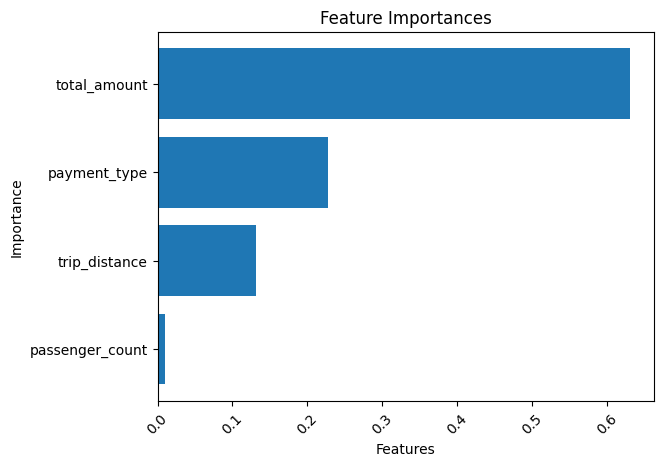

In [51]:
# use the best random forest
best_rf = rf_50

# get feature importances
feature_importances = best_rf.feature_importances_

# create a dataframe to display feature importances and sort findings
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# display the feature importances for each feature
print(feature_importance_df)

# create a horizontal bar graph to model the results
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# label x axis
plt.xlabel('Features')
# label y axis
plt.ylabel('Importance')
# give the plot a label
plt.title('Feature Importances')
# rotate the x axis values for readability
plt.xticks(rotation=45)

# show the plot
plt.show()

### Explaining Results
Based on the bar chart above, it is seen that the total amount was the most important feature based upon the calculations. This was followed by payment type, trip distance, and then passanger count. Theoretically, I feel like this ordering definitely makes a lot of sense - as in it makes sense that passenger count was not much of a factor while total amount was a very large factor because tip could potentially be directly related through percentages (10% tip, 15% tip, etc.).

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
